# Survival Analysis II
## Levi Waldron

# Welcome and outline - session 6

* Vittinghoff sections 6.1-6.2, 6.4
* Review of Survival function and Kaplan-Meier estimator
* Hazard function
* Cox regression
    + the Cox proportional hazards model
    + proportional hazards
    + interpretation and inference from the Cox model

# Recall leukemia Example
* Study of 6-mercaptopurine (6-MP) maintenance therapy for children in remission from acute lymphoblastic leukemia (ALL)
* 42 patients achieved remission from induction therapy and were then randomized in equal numbers to 6-MP or placebo.
* Survival time studied was from randomization until relapse.

# Leukemia follow-up table

![leukemia Follow-up Table](figures/leukemiatable.png)

This is the **Kaplan-Meier Estimate** $\hat S(t)$ of the Survival function $S(t)$.

# The hazard function h(t)

* *Definition*: (review) The *survival function* at time t, denoted $S(t)$, is the probability of being event-free at t.  Equivalently, it is the probability that the survival time is greater than t.

* *Definition*: (review) The *cumulative event function* at time t, denoted $F(t)$, is the probability that the event has occurred by time t, or equivalently, the probability that the survival time is less than or equal to t. $F(t) = 1-S(t)$.

* *Definition*: The *hazard function* $h(t)$ is the short-term event rate for subjects who have not yet experienced an event.
    + $h(t)$ is the probability of an event in the time interval $[t, t+s]$ (s is small), given that the individual has survived up to time t
$$h(t) = \lim_{s \to 0} \frac{Pr(t \leq T < t+s | T \ge t)}{s}$$

# Leukemia Kaplan-Meier plot

Loading required package: ggplot2
Loading required package: ggpubr
Loading required package: magrittr


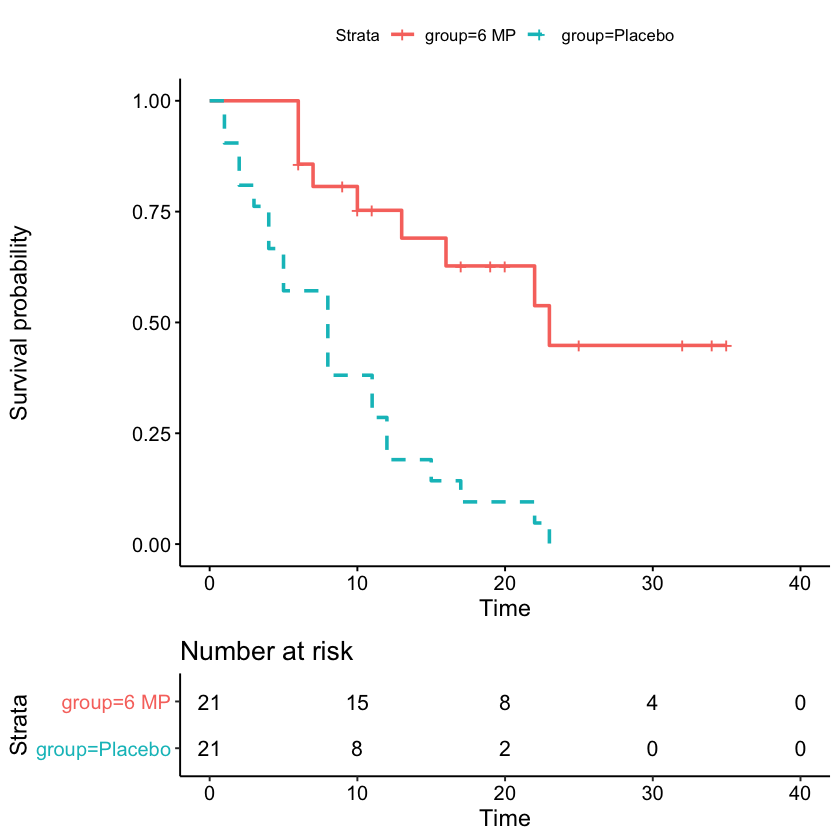

In [1]:
leuk <- read.csv("leuk.csv")
library(survival)
kmfit <- survival::survfit(Surv(time, cens)~group, data=leuk)
library(survminer)
survminer::ggsurvplot(kmfit, risk.table = TRUE, linetype=1:2)

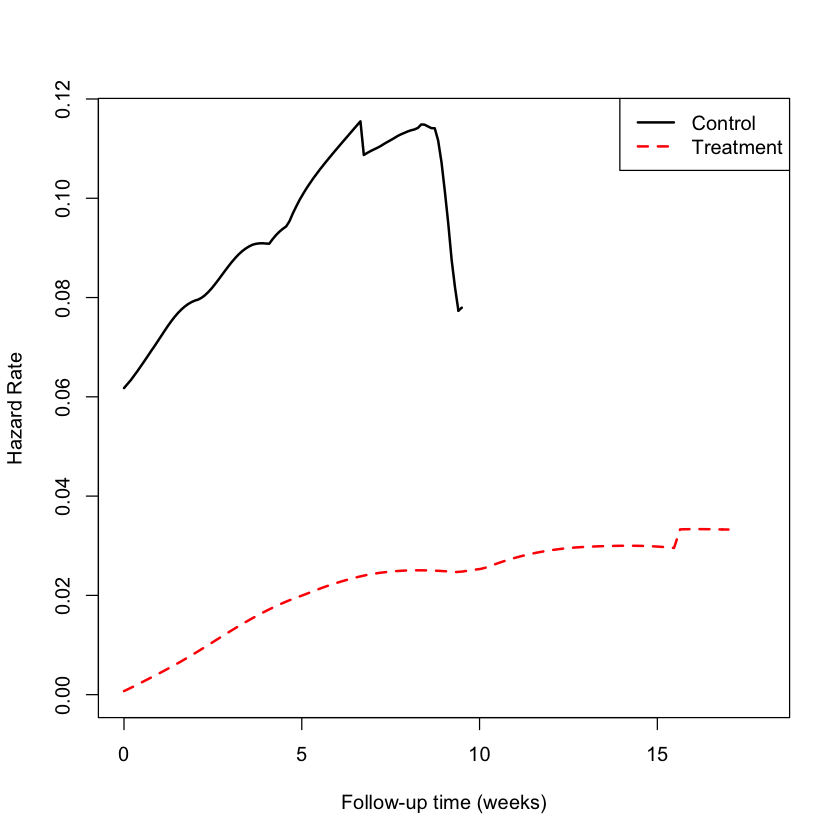

In [2]:
library(muhaz)
haztreat = with(leuk[leuk$group=="6 MP", ], muhaz(time, cens))
hazcontrol = with(leuk[leuk$group=="Placebo", ], muhaz(time, cens))
plot(hazcontrol, lwd=2, xlab="Follow-up time (weeks)", xlim=c(0, 18))
lines(haztreat, lty=2, lwd=2, col="red")
legend("topright", legend=c("Control", "Treatment"), lty=1:2, lwd=2, col=c("black", "red"))

* See http://sas-and-r.blogspot.com/2010/06/example-741-hazard-function-plotting.html for R + SAS instructions

# The Hazard Ratio (HR)

* If we are comparing the hazards of a control and a treatment group, it could in general be a function of time:
    + $HR(t) = h_T(t) / h_C(t)$
* Interpretation: the risk of event for the treatment group compared to the control group, as a function of time

# Recall previous regression models

$$
E[y_i|x_i] = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + ... + \beta_p x_{pi}
$$

* $x_p$ are the predictors or independent variables
* $y$ is the outcome, response, or dependent variable
* $E[y|x]$ is the expected value of $y$ given $x$
* $\beta_p$ are the regression coefficients

For logistic regression:
$$
Logit(P(x_i)) = log \left( \frac{P(x_i)}{1-P(x_i)} \right) = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + ... + \beta_p x_{pi}
$$

For log-linear regression:
$$
log(E[y_i|x_i]) = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + ... + \beta_p x_{pi}
$$

# Cox proportional hazards model

* Cox proportional hazards regression assesses relationship between a right-censored, time-to-event outcome and predictors:
    + categorical variables (e.g., treatment groups)
    + continuous variables
$$
log(HR(x_i)) = log \frac{h(t|x_i)}{h_0(t)} = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + ... + \beta_p x_{pi}
$$
* $HR(x_i)$ is the hazard of patient $i$ relative to baseline
* $h(t|x_i)$ is the time-dependent hazard function $h(t)$ for patient $i$
* $h_0(t)$ is the *baseline hazard function*

Multiplicative or additive model?

# Interpretation of coefficients

* Coefficients $\beta$ for a categorical / binary predictor:
    + $\beta$ is the $log$ of the ratio of hazards for the comparison group relative to reference group ($log(HR)$)
* Coefficients $\beta$ for a continuous predictor:
    + $\beta$ is the $log$ of the ratio of hazards for someone having a one unit higher value of $x$ (1 year, 1mm Hg, etc)

* If the hazard ratio ($exp(\beta)$) is close to 1 then the predictor does not affect survival
* If the hazard ratio is less than 1 then the predictor is protective (associated with improved survival)
* If the hazard ratio is greater than 1 then the predictor is associated with increased risk (= decreased survival)


# Hypothesis testing and CIs

* Wald Test or Likelihood Ratio Test for coefficients
    + $H_0: \beta=0, H_a: \beta \neq 0$ 
    + equivalent to $H_0: HR=1, H_a: HR \neq 1$
* CIs typically obtained from Wald Test, reported for $HR$

#  CoxPH regression for Leukemia dataset

In [3]:
leuk$group <- relevel(leuk$group, ref="Placebo")
coxfit <- coxph(Surv(time, cens)~group, data=leuk)
summary(coxfit)

Call:
coxph(formula = Surv(time, cens) ~ group, data = leuk)

  n= 42, number of events= 30 

             coef exp(coef) se(coef)      z Pr(>|z|)    
group6 MP -1.5721    0.2076   0.4124 -3.812 0.000138 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

          exp(coef) exp(-coef) lower .95 upper .95
group6 MP    0.2076      4.817   0.09251    0.4659

Concordance= 0.69  (se = 0.053 )
Rsquare= 0.322   (max possible= 0.988 )
Likelihood ratio test= 16.35  on 1 df,   p=5e-05
Wald test            = 14.53  on 1 df,   p=1e-04
Score (logrank) test = 17.25  on 1 df,   p=3e-05


# The Proportional Hazards Assumption

* *Definition*: Under the *proportional hazards assumption*, the hazard ratio does not vary with time. That is, $HR(t) \equiv HR$.

* In other words, $HR$ does not vary with time
    + $HR(t)$ is a constant, $HR$, at *all times* t
    + this assumption is about the population, of course there will be sampling variation

# A nice proportional hazards dataset

<p>
<img src="vittinghofffig63.png">
</p>

# Log-minus-log plot

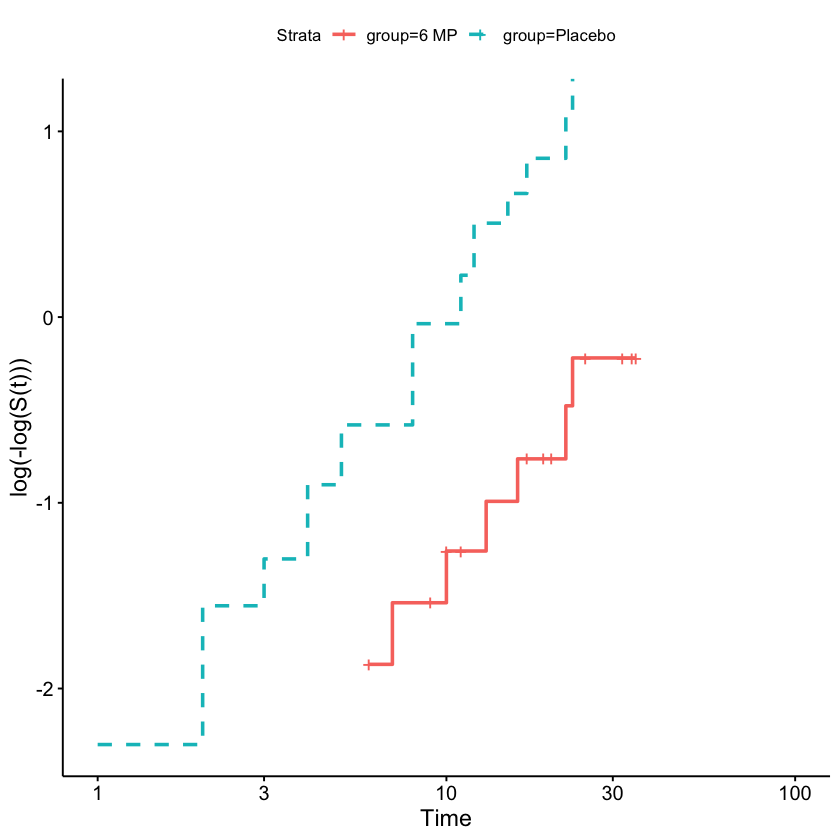

In [4]:
survminer::ggsurvplot(kmfit, fun="cloglog", risk.table = FALSE, linetype=1:2,
           main="log-minus-log plot for Leukemia dataset")

# Assumptions of Cox PH model

* Constant hazard ratio over time (proportional hazards)
* A linear association between the natural log of the relative hazard and the predictors (log-linearity)
    + A multiplicative relationship between the predictors and the hazard
* Uninformative censoring

# Parametric versus semi-parametric models

* Cox proportional hazards model is semi-parametric
    + assumes proportional hazards (PH), but no assumption on $h_0(t)$
* Alternative parametric models model the baseline hazard
    + e.g. Weibull regression

* Cox model is considered more robust if PH assumption is not violated
    + time-dependent covariates may resolve apparent violations of the PH assumption.


# Next class
* Vittinghoff sections 6.2-6.4
* Checking model assumptions and fit
    + residuals analysis
* Multivariate Cox models
    + tests for trend
    + predicted survival for specific covariate patterns
    + predicted survival for adjusted coefficients
* Stratified survival models